# Домашнее задание к занятию «Поиск выбросов и генерация новых признаков»

In [266]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names

--2022-11-08 18:42:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11903 (12K) [application/x-httpd-php]
Saving to: ‘glass.data.1’

glass.data.1        100%[===================>]  11.62K  --.-KB/s    in 0s      

2022-11-08 18:42:51 (83.0 MB/s) - ‘glass.data.1’ saved [11903/11903]

--2022-11-08 18:42:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3506 (3.4K) [application/x-httpd-php]
Saving to: ‘glass.names.1’

glass.names.1       100%[===================>]   3.42K  --.-KB/s    in 0s      

2022-1

In [267]:
!cat glass.names

1. Title: Glass Identification Database

2. Sources:
    (a) Creator: B. German
        -- Central Research Establishment
           Home Office Forensic Science Service
           Aldermaston, Reading, Berkshire RG7 4PN
    (b) Donor: Vina Spiehler, Ph.D., DABFT
               Diagnostic Products Corporation
               (213) 776-0180 (ext 3014)
    (c) Date: September, 1987

3. Past Usage:
    -- Rule Induction in Forensic Science
       -- Ian W. Evett and Ernest J. Spiehler
       -- Central Research Establishment
          Home Office Forensic Science Service
          Aldermaston, Reading, Berkshire RG7 4PN
       -- Unknown technical note number (sorry, not listed here)
       -- General Results: nearest neighbor held its own with respect to the
             rule-based system

4. Relevant Information:n
      Vina conducted a comparison test of her rule-based system, BEAGLE, the
      nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is 
      a product available 

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [269]:
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
data = pd.read_csv('glass.data', header=None, names=columns)

In [270]:
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Удалим колонку `Id`, которая не несет никакой ценной информации

In [271]:
data.drop('Id', axis=1, inplace=True)

Посмотрим на пропуски и статистику

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [273]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Оценим перекос в классах

In [274]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Видно, что объектов класса 6 (tableware) почти на порядок меньше класса 2 (building_windows_non_float_processed)
Для разделения на обучающую и проверочную выборки воспользуемся стратификацией

In [275]:
y = data['Type']
X = data.drop('Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [276]:
model = RandomForestClassifier(random_state=0)

In [277]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [278]:
model.score(X_test, y_test)

0.7441860465116279

Важность признаков

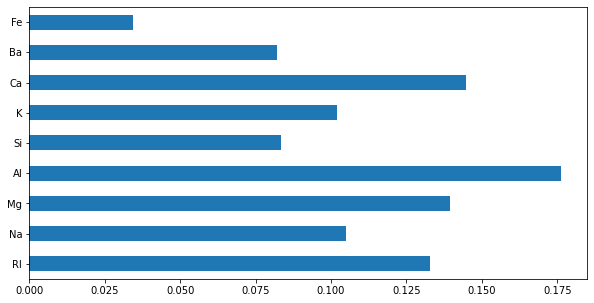

In [279]:
plt.rcParams['figure.figsize'] = 10,5
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

Очевидно переобучение модели. Попробуем настроить гиперпараметров `max_depth` и  `min_samples_leaf`

In [280]:
model = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=0)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8830409356725146

In [281]:
model.score(X_test, y_test)

0.6976744186046512

Важность признаков

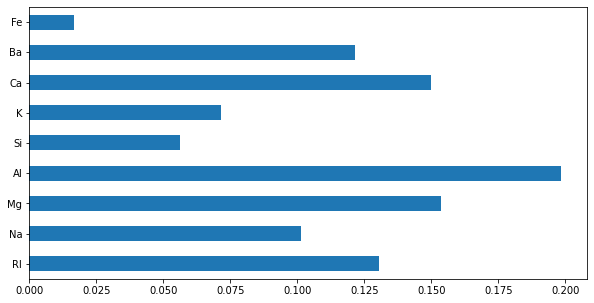

In [282]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

Видим некоторое улучшение точности модели

Изучим распределения значений признаков

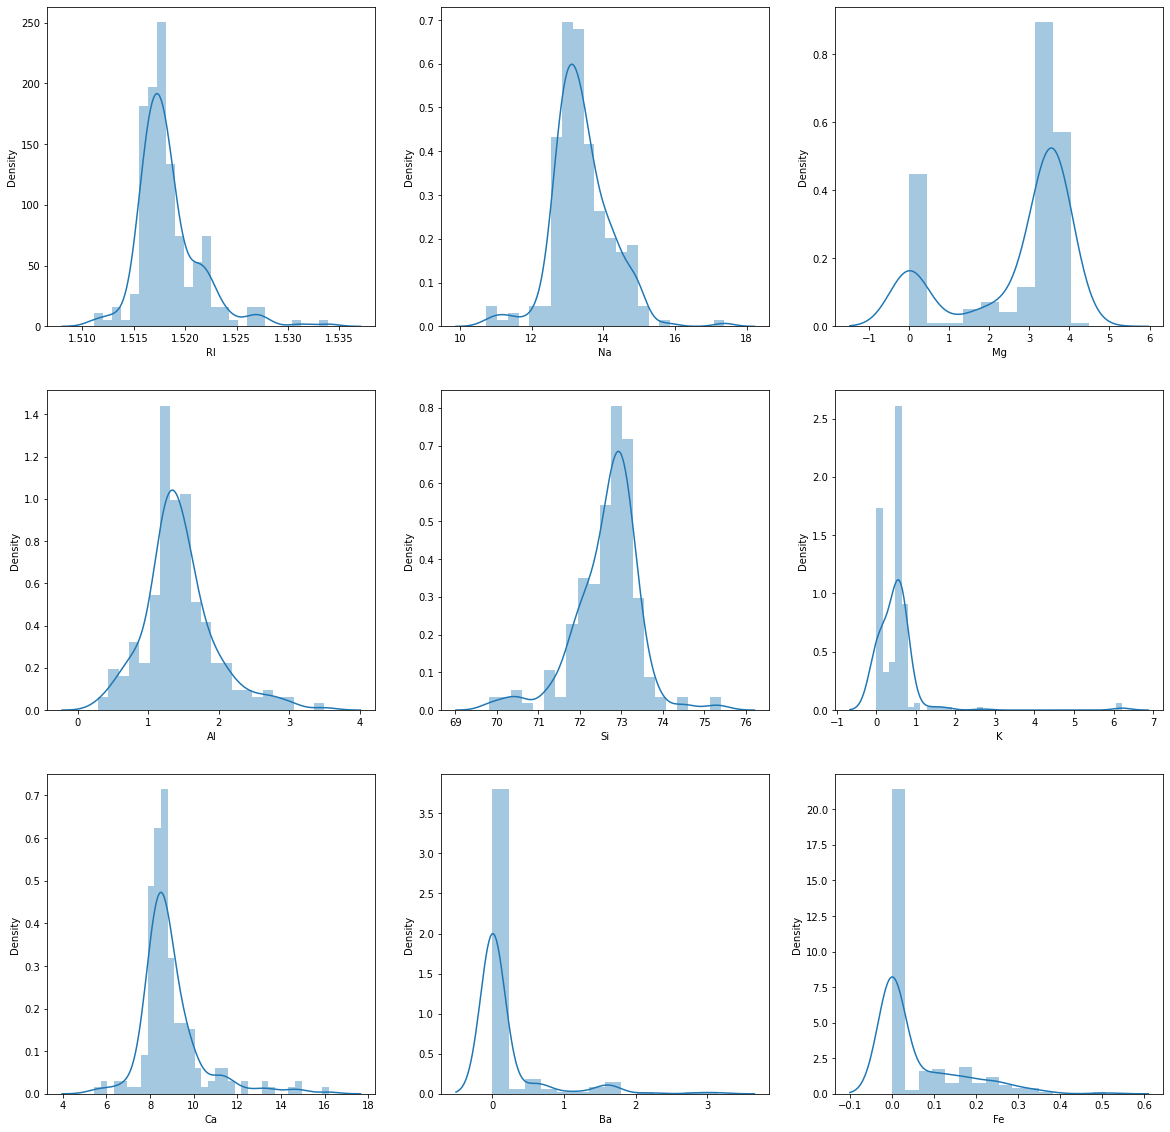

In [283]:
plt.rcParams['figure.figsize'] = 20,20

fig, axs = plt.subplots(3,3)

sns.distplot(X['RI'], ax=axs[0,0])
sns.distplot(X['Na'], ax=axs[0,1])
sns.distplot(X['Mg'], ax=axs[0,2])
sns.distplot(X['Al'], ax=axs[1,0])
sns.distplot(X['Si'], ax=axs[1,1])
sns.distplot(X['K'], ax=axs[1,2])
sns.distplot(X['Ca'], ax=axs[2,0])
sns.distplot(X['Ba'], ax=axs[2,1])
sns.distplot(X['Fe'], ax=axs[2,2])


Посмотрим на наличие выбросов и отклонений

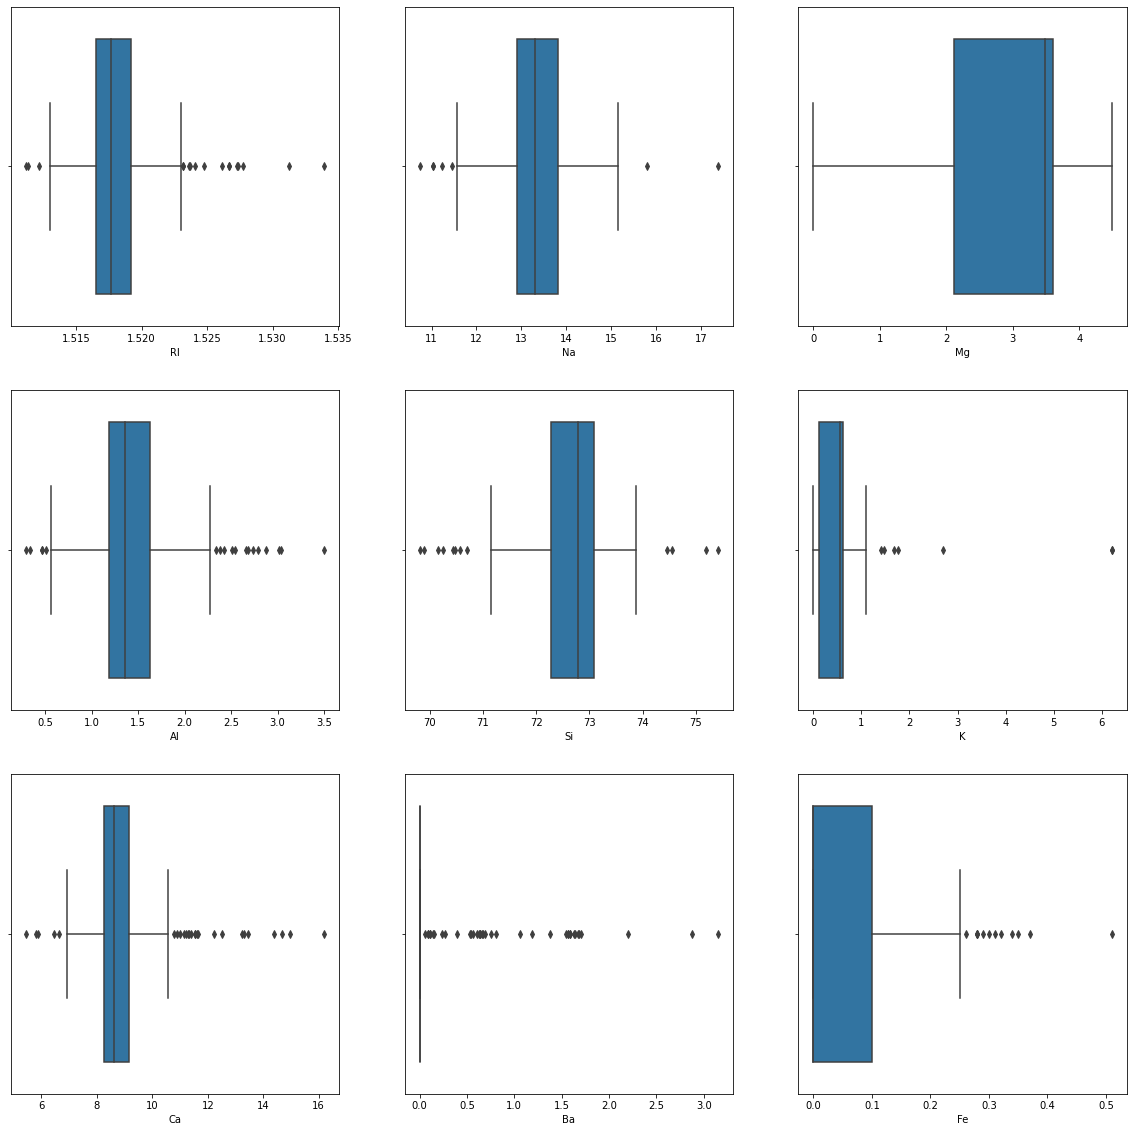

In [284]:
fig, axs = plt.subplots(3,3)

sns.boxplot(X['RI'], ax=axs[0,0])
sns.boxplot(X['Na'], ax=axs[0,1])
sns.boxplot(X['Mg'], ax=axs[0,2])
sns.boxplot(X['Al'], ax=axs[1,0])
sns.boxplot(X['Si'], ax=axs[1,1])
sns.boxplot(X['K'], ax=axs[1,2])
sns.boxplot(X['Ca'], ax=axs[2,0])
sns.boxplot(X['Ba'], ax=axs[2,1])
sns.boxplot(X['Fe'], ax=axs[2,2])

Видно, что распределения парамтра `Ri` а также содержания элементов `Na`, `Al`, `Si`, `Ca` в некоторой степени близки к нормальным, во всех призаках, кроме содержания `Mg` присутствуют выбросы

Для удаления выбросов возьмеме границы квантиля 0.01 и 0.99 для всех признаков, кроме `Mg` и удалим потенциальные выбросы

In [285]:
for feature in ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    q_low = data[feature].quantile(0.01)
    q_high = data[feature].quantile(0.99)
    data_filtered = data[(data[feature] < q_high) & (data[feature] > q_low)]

Посмотрим на получившиеся распределения

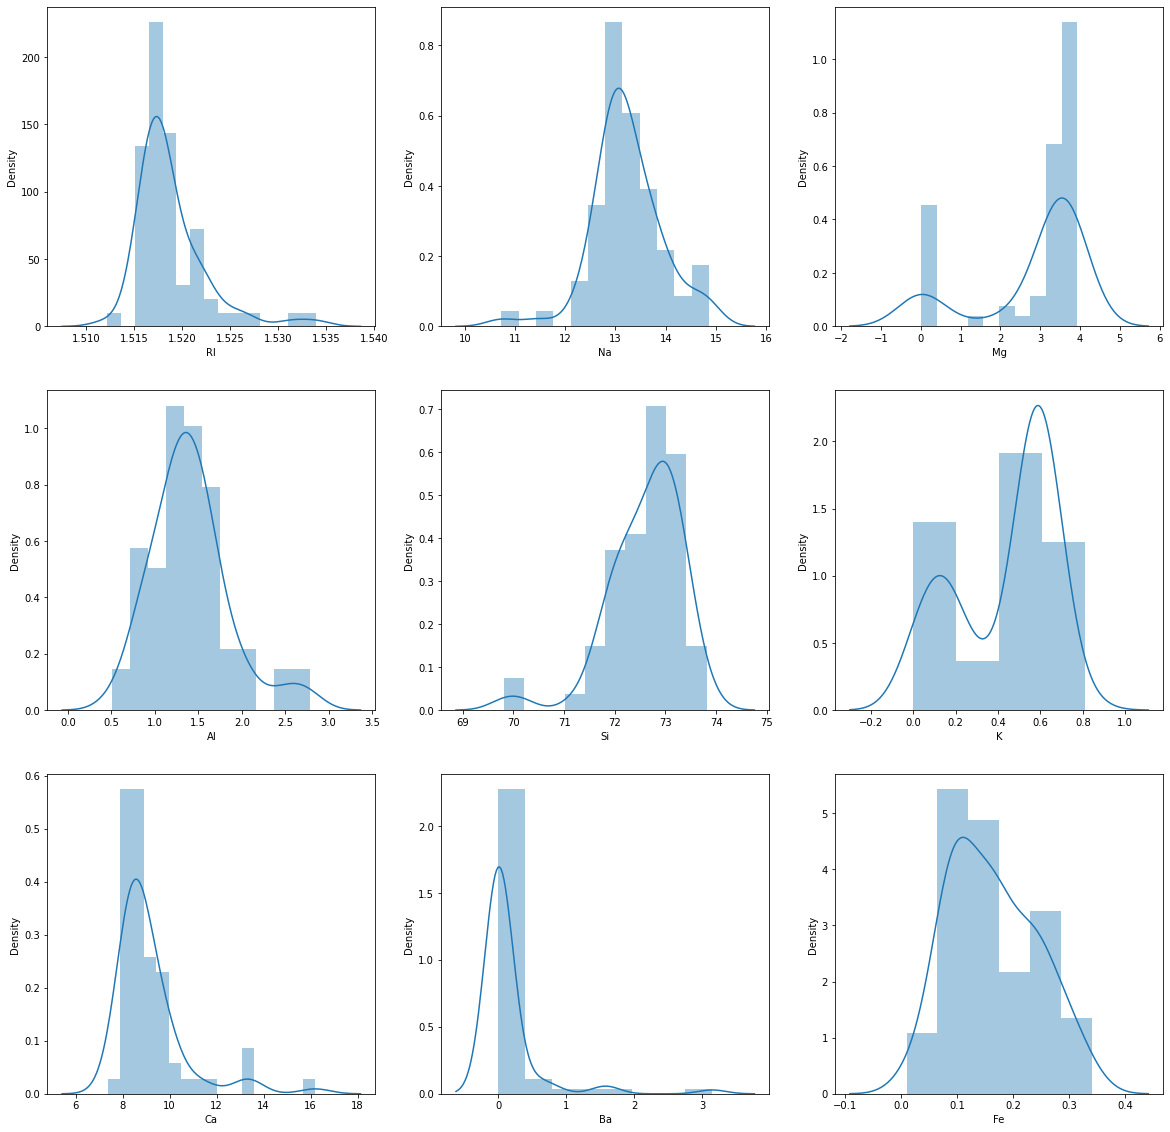

In [286]:
plt.rcParams['figure.figsize'] = 20,20

fig, axs = plt.subplots(3,3)

sns.distplot(data_filtered['RI'], ax=axs[0,0])
sns.distplot(data_filtered['Na'], ax=axs[0,1])
sns.distplot(data_filtered['Mg'], ax=axs[0,2])
sns.distplot(data_filtered['Al'], ax=axs[1,0])
sns.distplot(data_filtered['Si'], ax=axs[1,1])
sns.distplot(data_filtered['K'], ax=axs[1,2])
sns.distplot(data_filtered['Ca'], ax=axs[2,0])
sns.distplot(data_filtered['Ba'], ax=axs[2,1])
sns.distplot(data_filtered['Fe'], ax=axs[2,2])

Видно, что сильные выбросы были удалены
Посмотрим, сколько данных было потеряно в результате этих преобразований

In [287]:
(1 - len(data_filtered)/len(data))*100

68.69158878504673

Потеряно порядка 70% данных

Процент удаленных записей для каждого класса

In [288]:
for class_ in [1,2,3,5,6,7]:
    source = data[data['Type'] == class_]['Type'].count()
    filtered = data_filtered[data_filtered['Type'] == class_]['Type'].count()
    print(class_, (1-filtered/source)*100)

1 64.28571428571428
2 59.210526315789465
3 76.47058823529412
5 92.3076923076923
6 100.0
7 79.3103448275862


Класс 6 потерян полностью
Попробуем удалить данные используя визуальное представление из диаграммы boxplot выше:

- RI > 1530
- Na > 17
- Al > 3.5
- K > 6
- Ca > 16
- Fe > 0.5

`Mg` и `Si` не трогаем

`Ba` не трогаем, т.к. его распределение не является нормальным, этот элемент встречается редко.

In [289]:
mask = ((data['RI'] > 1530)
        | (data['Na'] > 17)
        | (data['Al'] > 3.5)
        | (data['K'] > 6)
        | (data['Ca'] > 16)
        | (data['Fe'] > 0.5))

In [290]:
data_filtered = data.copy()
data_filtered[mask] = np.nan
data_filtered.dropna(inplace=True)

Процент потеряных данных

In [291]:
(1 - len(data_filtered)/len(data))*100

2.336448598130836

Процент потеряных данных по классам

In [292]:
for class_ in [1,2,3,5,6,7]:
    source = data[data['Type'] == class_]['Type'].count()
    filtered = data_filtered[data_filtered['Type'] == class_]['Type'].count()
    print(class_, (1 - filtered/source)*100)

1 0.0
2 1.3157894736842146
3 0.0
5 23.076923076923073
6 11.111111111111116
7 0.0


Посмотрим на результаты работы модели на обработанных данных

In [293]:
y = data_filtered['Type']
X = data_filtered.drop('Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [294]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [295]:
model.score(X_test, y_test)

0.7857142857142857

Важность признаков

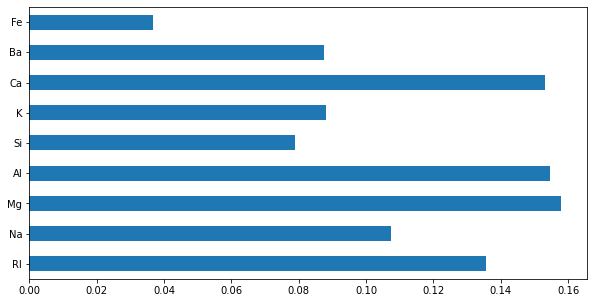

In [296]:
plt.rcParams['figure.figsize'] = 10,5

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

Мы опять получили переобученую модель, но результат на тестовой выборке выше.
Попробуем модель с гиперпараметрами

In [297]:
model = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=0)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9221556886227545

In [298]:
model.score(X_test, y_test)

0.7380952380952381

Важность признаков

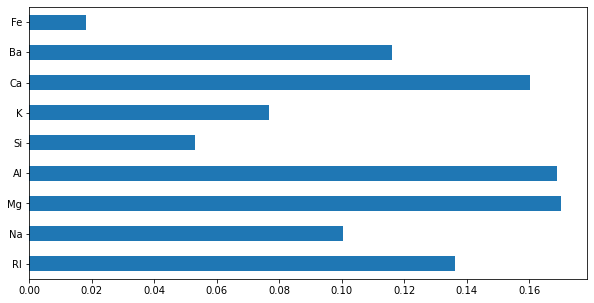

In [299]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

## Выводы
1. Попытка удалить выбросы просто отсекая все данные, что лежат вне пределов [-3σ, 3σ] не увенчались успехом, т.к. мы в таком случае полностью потеряли данные об одном из классов
2. Более вдумчивое удаление выбросов дает лучший результат, особенно если признак не имеет ничего сходного с нормальным распределением (`Ba`)
3. На результаты работы моделе очень сильно влияют исходный random_seed при разделении выборки, по всей видимости из-за малого количества точек в выборке
4. На результаты работы моделе также сильно влияет выбор комбинации гиперпараметров

| Модель                                                                         | train score        | test score         |
|--------------------------------------------------------------------------------|--------------------|--------------------|
| RandomForestClassifier()                                                       | 1.0                | 0.7441860465116279 |
| RandomForestClassifier ( max_depth= 5 ,  min_samples_leaf= 3)                  | 0.8830409356725146 | 0.6976744186046512 |
| RandomForestClassifier()  Удалены выбросы                                      | 1.0                | 0.7857142857142857 |
| RandomForestClassifier ( max_depth= 5 ,  min_samples_leaf= 3)  Удалены выбросы | 0.9221556886227545 | 0.7380952380952381 |